<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/timeseries/Getting_started_with_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from prophet import Prophet



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1lcsveej/uk3vj046.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1lcsveej/8vl8k60d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20012', 'data', 'file=/tmp/tmp1lcsveej/uk3vj046.json', 'init=/tmp/tmp1lcsveej/8vl8k60d.json', 'output', 'file=/tmp/tmp1lcsveej/prophet_modelhf8zmuy0/prophet_model-20231117072234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:22:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:22:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.485228,8.952705
3266,2017-01-16,8.535122,7.760633,9.257154
3267,2017-01-17,8.322549,7.618558,9.045223
3268,2017-01-18,8.155179,7.447721,8.833384
3269,2017-01-19,8.167136,7.448849,8.928702


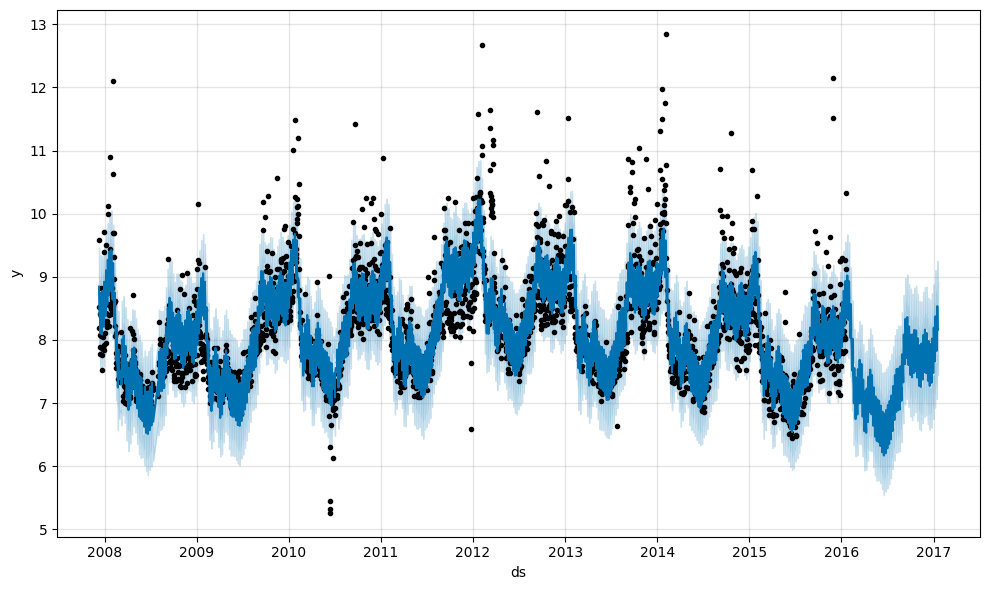

In [ ]:
fig1 = m.plot(forecast)

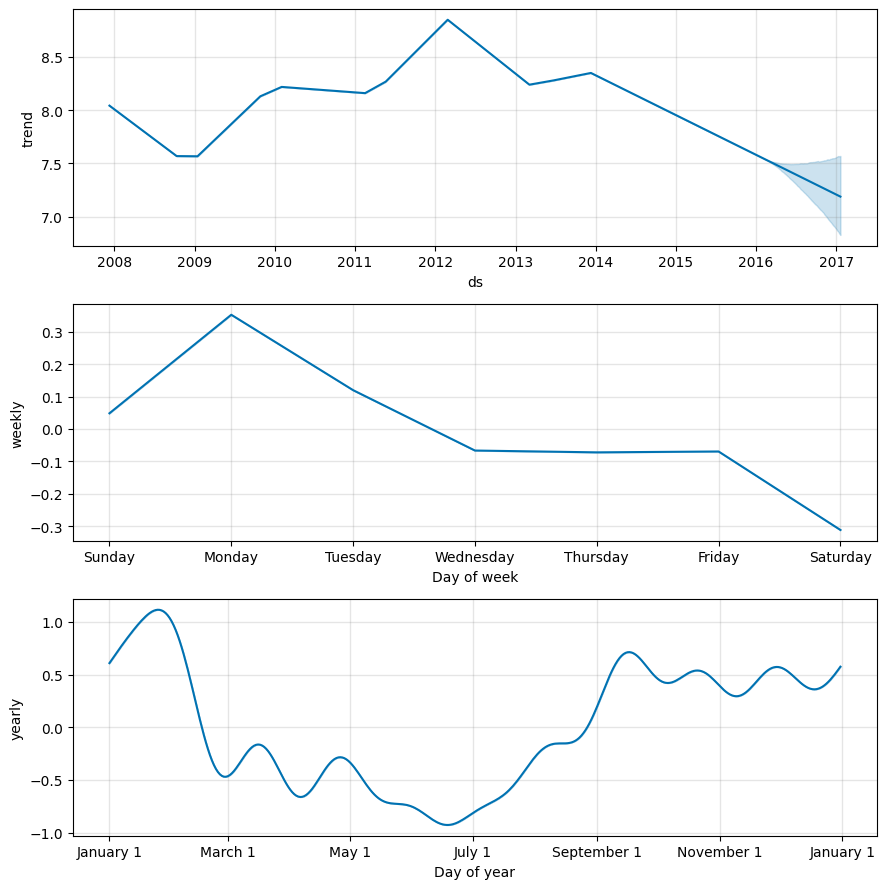

In [ ]:
fig2 = m.plot_components(forecast)



In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [ ]:
plot_components_plotly(m, forecast)